# Import Libraries

In [1]:
import nltk
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
#nltk.download('stopwords')
#nltk.download('wordnet')


In [2]:
import pandas as pd
pd.set_option('display.max_colwidth',200)
df=pd.read_csv(r"C:\Users\DELL\GrammarandProductReviews.csv",encoding='UTF-8',sep=',')

df.head()

,rating,reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...
1,5,Good flavor. This review was collected as part of a promotion.
2,5,Good flavor.
3,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n..."
4,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


In [3]:
df.shape

(71044, 2)

# Exploratory data analysis (EDA)

EDA is done to analysis data and visualize data in different bar-chart and graphs.

# Missing Values

We can use seaborn to create a simple heatmap to see wherewe are missing data.

In [4]:
df.isnull()

,rating,reviews
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
71039,False,False
71040,False,False
71041,False,False
71042,False,False


In [5]:
#Another way to check the missing data/Count the empty values in each column.


df.isna().sum()

rating      0
reviews    36
dtype: int64

In above, we find there are 36 data are missing in reviews columns.So, we have to remove these null in the below preprossing step to get better model accuracy. 

In [6]:
#To get more information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   71044 non-null  int64 
 1   reviews  71008 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


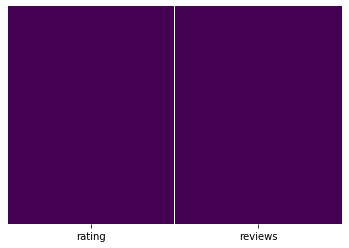

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualize the count of rating

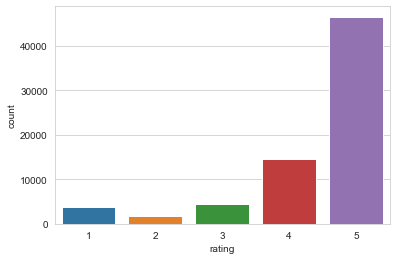

In [8]:
sns.set_style('whitegrid')
sns.countplot(df['rating'])

To show column rating in curve bar chat

In [9]:
#sns.distplot(df['rating'],kde=False,color='whitegrid',bins=10)
  #OR
#sns.distplot(df['rating'],kde=False,color='whitegrid',bins=10)

In [10]:
#To fill the mean value in empty columns which gives nan values in text type of dataset so, its better to remove all empty rows.

# df.rating = df.rating.fillna(df.rating.mean())
# df.head(1363)

In [11]:
# #To remove all the rows that contains null values

df.dropna(subset = ["reviews"], inplace=True)
df


,rating,reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...
1,5,Good flavor. This review was collected as part of a promotion.
2,5,Good flavor.
3,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, n..."
4,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.
...,...,...
71039,5,I'm dealing with dry eyes and very sensitive to products. The eye clinic suggested this product and it's been just what I needed. I put a drop in each eye in the morning when I put my contacts in ...
71040,5,Great stuff! Helps keep my contacts moist all day!
71041,5,Right price
71042,5,"I was so pleased when this scarf arrived for multiple reasons. The print and colors are beautiful and will go many outfits, casual or dressy. The muslin texture of the scarf is so soft and the cov..."


# Preprocessing

In [12]:
df.reviews = df.reviews.astype(str) 
df.rating = df.rating.astype(int) 
df.reviews = df.reviews.apply(lambda x: x.lower())
df.head()

,rating,reviews
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...
1,5,good flavor. this review was collected as part of a promotion.
2,5,good flavor.
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, n..."
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.


# Removing Punctuation 

In [13]:
import string
def remove_punctuations(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    return txt

In [14]:
df['new_column'] = df['reviews'].apply(remove_punctuations)
df.head()

,rating,reviews,new_column
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy
1,5,good flavor. this review was collected as part of a promotion.,good flavor this review was collected as part of a promotion
2,5,good flavor.,good flavor
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, n...",i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel


# Removing Number 

In [15]:
df['new_cloumns'] = df['new_column'].str.replace('\d+', 'number') # to replace no. by ""
df.head(10)

,rating,reviews,new_column,new_cloumns
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it numberstar rating all the way her metaphors are just crazy
1,5,good flavor. this review was collected as part of a promotion.,good flavor this review was collected as part of a promotion,good flavor this review was collected as part of a promotion
2,5,good flavor.,good flavor,good flavor
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, n...",i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...,i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel
5,1,my boyfriend and i bought this to spice things up in the bedroom and we were both highly disappointed in this product. we bought this one because we absolutely love the ky yours and mine and we th...,my boyfriend and i bought this to spice things up in the bedroom and we were both highly disappointed in this product we bought this one because we absolutely love the ky yours and mine and we tho...,my boyfriend and i bought this to spice things up in the bedroom and we were both highly disappointed in this product we bought this one because we absolutely love the ky yours and mine and we tho...
6,1,bought this earlier today and was excited to check it out. based on the product description i was expecting something but it was just like the regular ky. we are fans of the his and hers so we jus...,bought this earlier today and was excited to check it out based on the product description i was expecting something but it was just like the regular ky we are fans of the his and hers so we just ...,bought this earlier today and was excited to check it out based on the product description i was expecting something but it was just like the regular ky we are fans of the his and hers so we just ...
7,1,i bought this product for my husband and i to try and we were not impressed at all. there was no tingling or warming. it left us both very sticky. i have used ky products in the past (loved ky his...,i bought this product for my husband and i to try and we were not impressed at all there was no tingling or warming it left us both very sticky i have used ky products in the past loved ky his and...,i bought this product for my husband and i to try and we were not impressed at all there was no tingling or warming it left us both very sticky i have used ky products in the past loved ky his and...
8,1,my husband and i bought this for some extra fun. we werevboth extremely disappointed. especially for the price! do not waste your money on this product. we felt nothing but a sticky mess from it.,my husband and i bought this for some extra fun we werevboth extremely disappointed especially for the price do not waste y

# Tokenization

In [16]:
import re

def tokenize(txt):
    tokens = re.split('\W+' , txt)
    return tokens
df['tokenize']=df['new_column'].apply(lambda x: tokenize(x.lower()))
df.head()

,rating,reviews,new_column,new_cloumns,tokenize
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it numberstar rating all the way her metaphors are just crazy,"[i, love, this, album, its, very, good, more, to, the, hip, hop, side, than, her, current, pop, sound, so, hype, i, listen, to, this, everyday, at, the, gym, i, give, it, 5star, rating, all, the, ..."
1,5,good flavor. this review was collected as part of a promotion.,good flavor this review was collected as part of a promotion,good flavor this review was collected as part of a promotion,"[good, flavor, this, review, was, collected, as, part, of, a, promotion]"
2,5,good flavor.,good flavor,good flavor,"[good, flavor]"
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, n...",i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...,i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...,"[i, read, through, the, reviews, on, here, before, looking, in, to, buying, one, of, the, couples, lubricants, and, was, ultimately, disappointed, that, it, didnt, even, live, up, to, the, reviews..."
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,"[my, husband, bought, this, gel, for, us, the, gel, caused, irritation, and, it, felt, like, it, was, burning, my, skin, i, wouldnt, recommend, this, gel]"


# Removing Stopword 

In [17]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean
df['sw']=df['tokenize'].apply(lambda x: remove_stopwords(x))
df.head()

,rating,reviews,new_column,new_cloumns,tokenize,sw
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it numberstar rating all the way her metaphors are just crazy,"[i, love, this, album, its, very, good, more, to, the, hip, hop, side, than, her, current, pop, sound, so, hype, i, listen, to, this, everyday, at, the, gym, i, give, it, 5star, rating, all, the, ...","[love, album, good, hip, hop, side, current, pop, sound, hype, listen, everyday, gym, give, 5star, rating, way, metaphors, crazy]"
1,5,good flavor. this review was collected as part of a promotion.,good flavor this review was collected as part of a promotion,good flavor this review was collected as part of a promotion,"[good, flavor, this, review, was, collected, as, part, of, a, promotion]","[good, flavor, review, collected, part, promotion]"
2,5,good flavor.,good flavor,good flavor,"[good, flavor]","[good, flavor]"
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, n...",i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...,i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...,"[i, read, through, the, reviews, on, here, before, looking, in, to, buying, one, of, the, couples, lubricants, and, was, ultimately, disappointed, that, it, didnt, even, live, up, to, the, reviews...","[read, reviews, looking, buying, one, couples, lubricants, ultimately, disappointed, didnt, even, live, reviews, read, starters, neither, boyfriend, could, notice, sort, enhanced, captivating, sen..."
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,"[my, husband, bought, this, gel, for, us, the, gel, caused, irritation, and, it, felt, like, it, was, burning, my, skin, i, wouldnt, recommend, this, gel]","[husband, bought, gel, us, gel, caused, irritation, felt, like, burning, skin, wouldnt, recommend, gel]"


# Lemattization

In [19]:
from nltk.stem import WordNetLemmatizer
wn=WordNetLemmatizer()

In [20]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    
    return text

df['lemmatize']= df['sw'].apply(lambda x : lemmatization(x))
df.head()

,rating,reviews,new_column,new_cloumns,tokenize,sw,lemmatize
0,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. so hype! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just c...,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy,i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it numberstar rating all the way her metaphors are just crazy,"[i, love, this, album, its, very, good, more, to, the, hip, hop, side, than, her, current, pop, sound, so, hype, i, listen, to, this, everyday, at, the, gym, i, give, it, 5star, rating, all, the, ...","[love, album, good, hip, hop, side, current, pop, sound, hype, listen, everyday, gym, give, 5star, rating, way, metaphors, crazy]","[love, album, good, hip, hop, side, current, pop, sound, hype, listen, everyday, gym, give, 5star, rating, way, metaphor, crazy]"
1,5,good flavor. this review was collected as part of a promotion.,good flavor this review was collected as part of a promotion,good flavor this review was collected as part of a promotion,"[good, flavor, this, review, was, collected, as, part, of, a, promotion]","[good, flavor, review, collected, part, promotion]","[good, flavor, review, collected, part, promotion]"
2,5,good flavor.,good flavor,good flavor,"[good, flavor]","[good, flavor]","[good, flavor]"
3,1,"i read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews i had read. for starters, n...",i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...,i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neith...,"[i, read, through, the, reviews, on, here, before, looking, in, to, buying, one, of, the, couples, lubricants, and, was, ultimately, disappointed, that, it, didnt, even, live, up, to, the, reviews...","[read, reviews, looking, buying, one, couples, lubricants, ultimately, disappointed, didnt, even, live, reviews, read, starters, neither, boyfriend, could, notice, sort, enhanced, captivating, sen...","[read, review, looking, buying, one, couple, lubricant, ultimately, disappointed, didnt, even, live, review, read, starter, neither, boyfriend, could, notice, sort, enhanced, captivating, sensatio..."
4,1,my husband bought this gel for us. the gel caused irritation and it felt like it was burning my skin. i wouldn't recommend this gel.,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,"[my, husband, bought, this, gel, for, us, the, gel, caused, irritation, and, it, felt, like, it, was, burning, my, skin, i, wouldnt, recommend, this, gel]","[husband, bought, gel, us, gel, caused, irritation, felt, like, burning, skin, wouldnt, recommend, gel]","[husband, bought, gel, u, gel, caused, irritation, felt, like, burning, skin, wouldnt, recommend, gel]"


In [21]:
df.isna().sum()

rating         0
reviews        0
new_column     0
new_cloumns    0
tokenize       0
sw             0
lemmatize      0
dtype: int64

In [22]:
df.info() #provides info of null fields

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71008 entries, 0 to 71043
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       71008 non-null  int32 
 1   reviews      71008 non-null  object
 2   new_column   71008 non-null  object
 3   new_cloumns  71008 non-null  object
 4   tokenize     71008 non-null  object
 5   sw           71008 non-null  object
 6   lemmatize    71008 non-null  object
dtypes: int32(1), object(6)
memory usage: 4.1+ MB


# Splitting Dataset for Training and Testing 

In [23]:
# Split the dataset into features data and target data

y = df['rating']
X = df['lemmatize']

In [24]:
#Split the dataset again, into 70% training dataset and 30% twsting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
len(X_train)

49705

In [26]:
len(X_test)

21303

In [27]:
print(X_train)

39356                                                                                                                   [cute, movie, son, siding, song, dont, particularly, like, hearing, 5, year, old, voice]
20627                                                                                                                                                              [great, product, smell, wonderful, use, time]
51005                                                                                                               [another, reason, shopped, line, free, shipping, house, step, walmart, people, change, life]
61392                                                                                                                                                                                            [walking, well]
52339                                                [quite, excited, try, product, heard, great, thing, used, day, ended, skin, reaction, unfortunate, gave, produc

# Feature Extraction

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
Count_Vectorizer = CountVectorizer(analyzer = lemmatization)

print(Count_Vectorizer)


CountVectorizer(analyzer=<function lemmatization at 0x0000029F622D1438>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
Count_Vectorizer = CountVectorizer(analyzer = lemmatization)

training_data = Count_Vectorizer.fit_transform(X_train)
#testing_data = Count_Vectorizer.transform(X_test)
training_data_toarray= training_data.toarray()
print(training_data_toarray)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(training_data)

In [31]:
testing_data = Count_Vectorizer.transform(X_test)
#X_test_tfidf=tfidf_transformer.fit_transform(testing_data)--->fit_transform() is not applied on testing part but transform() is used.
X_test_tfidf=tfidf_transformer.transform(testing_data)

In [32]:
X_train_tfidf.shape

(49705, 27202)

In [33]:
X_test_tfidf.shape

(21303, 27202)

In [34]:
# #There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks.

# sns.set_style('whitegrid')
# sns.countplot(x='X_train_tfidf',data=df, palette='RdBu_r')

# Implementing the Naive Bayes model 

In [35]:
from sklearn.naive_bayes import MultinomialNB
MultinomialNB = MultinomialNB().fit(X_train_tfidf, y_train)
MultinomialNB.fit(X_train_tfidf,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Testing the model accuracy  in a training dataset

In [36]:

MultinomialNB.score(X_train_tfidf, y_train)
print("Accuracy on the training dataset: ", MultinomialNB.score(X_train_tfidf, y_train))

Accuracy on the training dataset:  0.6725279146967106


# Testing the model accuracy  in a test dataset

In [37]:
testing_data = Count_Vectorizer.transform(X_test)
X_test_tfidf=tfidf_transformer.transform(testing_data)

predict1= MultinomialNB.predict(X_test_tfidf)

In [38]:
from sklearn import metrics
print(metrics.classification_report(y_test,  predict1))

              precision    recall  f1-score   support

           1       0.92      0.09      0.16      1159
           2       0.00      0.00      0.00       531
           3       0.67      0.00      0.00      1334
           4       0.36      0.02      0.04      4344
           5       0.66      1.00      0.80     13935

    accuracy                           0.66     21303
   macro avg       0.52      0.22      0.20     21303
weighted avg       0.60      0.66      0.54     21303



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, predict1)

print("Model Accuracy on test dataset: ", accuracy_score)


Model Accuracy on test dataset:  0.6604703562878468


In [40]:
print(metrics.confusion_matrix(y_test, predict1))

[[  103     0     0     4  1052]
 [    5     0     0    14   512]
 [    2     0     2    73  1257]
 [    2     0     1    82  4259]
 [    0     0     0    52 13883]]


In [41]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score

#print("Accuracy : ", accuracy_score(y_test, MultinomialNB.predict(X_test_tfidf)))
#print("Precision : ", precision_score(y_test, MultinomialNB.predict(X_test_tfidf)))
#print("Recall : ", recall_score(y_test, MultinomialNB.predict(X_test_tfidf)))


# Checking for real world  input

In [42]:
doc1 = ['This product so far has not disappointed', 'electronics product are bad']
doc1_counts = Count_Vectorizer.transform(doc1)
doc1_tfidf=tfidf_transformer.transform(doc1_counts)
predicted= MultinomialNB.predict(doc1_tfidf)
print(predicted)

[5 5]


# Applying CV

In [43]:
#from sklearn.model_selection import cross_val_score
#score=cross_val_score(clf,X,y,cv=5)

In [44]:
#score.mean()

# Implementing the Support Vector Machine(svm) model and fitting the taining dataset

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_tfidf, y_train)

# Testing the model accuracy  in a training dataset

In [46]:

#SVC.score(X_train_tfidf, y_train)
print("Accuracy on the training dataset: ", SVC.score(X_train_tfidf, y_train))

# Testing the model accuracy  in a training dataset

In [47]:
testing_data = Count_Vectorizer.transform(X_test)
X_test_tfidf=tfidf_transformer.fit_transform(testing_data)

predict2= svc.predict(X_test_tfidf)

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test,  predict2))

In [49]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, predict2(X_test_tfidf)))


In [50]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score

#print("Accuracy : ", accuracy_score(y_test, predict2(X_test_tfidf)))
#print("Precision : ", precision_score(y_test, predict2(X_test_tfidf)))
#print("Recall : ", recall_score(y_test, predict2(X_test_tfidf)))



# Checking for real world  input

In [51]:
doc2 = ['This product so far has not disappointed', 'electronics product are bad']
doc2_counts = Count_Vectorizer.transform(doc2)
doc2_tfidf=tfidf_transformer.transform(doc2_counts)
predicted= svc.predict(doc2_tfidf)
print(predicted)

# Implementing the LogisticRegression Algorithm and fitting the taining dataset

In [52]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Testing the model accuracy  in a training dataset

In [53]:

LogisticRegression.score(X_train_tfidf, y_train)
print("Accuracy on the training dataset: ", LogisticRegression.score(X_train_tfidf, y_train))

Accuracy on the training dataset:  0.7556785031686953


# Testing the model accuracy  in a test dataset

In [54]:
testing_data = Count_Vectorizer.transform(X_test)
#X_test_tfidf=tfidf_transformer.fit_transform(testing_data)
X_test_tfidf=tfidf_transformer.transform(testing_data)

predict3= LogisticRegression.predict(X_test_tfidf)

In [55]:
from sklearn import metrics
print(metrics.classification_report(y_test,  predict3))

              precision    recall  f1-score   support

           1       0.72      0.63      0.67      1159
           2       0.43      0.06      0.11       531
           3       0.45      0.17      0.25      1334
           4       0.42      0.21      0.28      4344
           5       0.75      0.94      0.83     13935

    accuracy                           0.71     21303
   macro avg       0.56      0.40      0.43     21303
weighted avg       0.65      0.71      0.66     21303



In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(y_test, predict3))


Accuracy score:  0.7061446744589964


In [57]:
print(metrics.confusion_matrix(y_test, predict3))

[[  730    20    39    45   325]
 [  124    33    66    87   221]
 [   75    10   224   410   615]
 [   39     8   122   924  3251]
 [   43     5    42   713 13132]]


# Checking for real world  input

In [58]:
doc3 = ['This product so far has not disappointed', 'electronics product are bad']
doc3_counts = Count_Vectorizer.transform(doc3)
doc3_tfidf=tfidf_transformer.transform(doc3_counts)
predicted= LogisticRegression.predict(doc3_tfidf)
print(predicted)

[5 5]
